# DS - Application Project <br>
# Developement of a Recommender System for Employee Skills - Descriptive analysis

## Preprocessing

In [16]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy.interpolate import make_interp_spline
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

Import data:

In [17]:
df = pd.read_csv("data/person-skills_2022-06-27.csv",sep=";") 
df.head(5)

,person,skill,category
0,12,Windows NT/2000/XP,Betriebssystem
1,12,MAC OS X,Betriebssystem
2,12,Windows 7,Betriebssystem
3,12,Windows 8,Betriebssystem
4,12,iOS,Betriebssystem


In [18]:
data_categories = df[["skill","category"]].drop_duplicates()
data_categories.head(5)

,skill,category
0,Windows NT/2000/XP,Betriebssystem
1,MAC OS X,Betriebssystem
2,Windows 7,Betriebssystem
3,Windows 8,Betriebssystem
4,iOS,Betriebssystem


Declaring various aiding variables

In [19]:
PERSONS = df["person"].unique()
SKILLS = sorted(df["skill"].unique())
CATEGORIES = df["category"].unique()
employee_dict = {}
for n in range(0,len(PERSONS)):
    employee_dict[n] = PERSONS[n]


## Descriptive Statistics

Check for each skill how many employees are proficent in that certain skill:

In [20]:
df_value_counts = df.skill.value_counts()
df_value_counts = df_value_counts.to_frame().rename(columns = {"skill" : "number_of_users"}).reset_index().rename(columns={'index': 'skill'})
df_value_counts

,skill,number_of_users
0,Englisch,315
1,MySQL,282
2,SCRUM,276
3,GIT,267
4,HTML,266
...,...,...
729,Final Cut,1
730,Datadog,1
731,Lead Generierung,1
732,Pulumi,1


in percent:

In [21]:
df_value_counts["number_of_users_%"] = df_value_counts.number_of_users/len(df_value_counts.number_of_users/len(df))
df_value_counts

,skill,number_of_users,number_of_users_%
0,Englisch,315,0.429155
1,MySQL,282,0.384196
2,SCRUM,276,0.376022
3,GIT,267,0.363760
4,HTML,266,0.362398
...,...,...,...
729,Final Cut,1,0.001362
730,Datadog,1,0.001362
731,Lead Generierung,1,0.001362
732,Pulumi,1,0.001362


In [22]:
df_value_counts[(df_value_counts.number_of_users == 10)]

,skill,number_of_users,number_of_users_%
397,Browser Debugging,10,0.013624
398,SharePoint,10,0.013624
399,Konzeption,10,0.013624
400,Sitecore,10,0.013624
401,Product Owner,10,0.013624
402,ActiveX,10,0.013624
403,ITCSS,10,0.013624
404,Laravel,10,0.013624
405,OpenShop,10,0.013624
406,Rational Unified Process (RUP),10,0.013624


### Plot the number of users for each skill

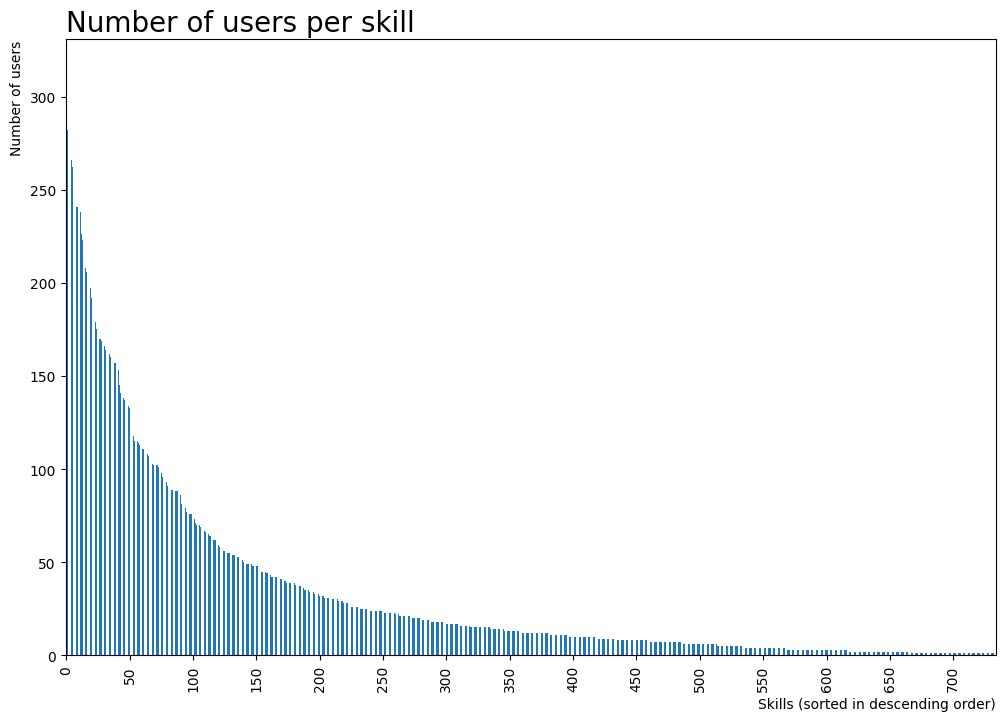

In [23]:
plt.figure(figsize=(12, 8))
ax = df_value_counts.number_of_users.plot(kind="bar")

##########
# Set the indexes as x labels
##########
ax.set_xticklabels(df_value_counts.index)

##########
# Set the x ticks   
##########
ax.set_xticks(np.arange(0,750,50).tolist())

##########
# Set the titles
##########
ax.set_title("Number of users per skill", fontsize=20,loc = 'left')
ax.set_xlabel("Skills (sorted in descending order)", fontsize=10,loc='right')
ax.set_ylabel("Number of users", fontsize=10,loc = 'top')
#plt.savefig("plots/number_of_users_per_skill.png")
plt.show()

**Description of the plot** <br>
On a descriptive level, the visualization shows impressively that the number of employees decreases exponentially with a higher index. While the skill with index 0 still has 315 users in the company, only 75 employees are proficient in the skill represented by index 100. All skills with an index of 397 or higher have a maximum of 10 users in the company.<br>
These observations lead to the conclusion that a large number of rare skills exist in Neusta. Especially these rare skills ensure that the matrix is sparse when setting up a user-item matrix in which the users are represented as rows and the skills as columns. However, such rare skills can also be understood as a differentiating feature for the users and thus form an important source of information for the recommender system

### Categorize the skills by their number of users and plot the distribution

In [24]:
df_categorized = df.groupby(["category", "skill"])["skill"].count().to_frame().rename(columns={"skill": "number_of_users"}).reset_index()
df_categorized.head(5)

,category,skill,number_of_users
0,.NET Frameworks und Tools,.NET Compact Framework,28
1,.NET Frameworks und Tools,.NET Core,10
2,.NET Frameworks und Tools,.NET Framework,87
3,.NET Frameworks und Tools,ADO.NET,23
4,.NET Frameworks und Tools,ASP Generalist,29


In [25]:
graduations = np.array([])

for i in df_categorized.number_of_users:
    if i > 200: 
        
        graduations = np.append(graduations,"> 200")
    elif i >= 100:
        graduations = np.append(graduations,"100 - 200")
    elif i >= 50:
        graduations = np.append(graduations,"50 - 100")
    elif i >= 10:
        graduations = np.append(graduations,"10 - 50")
    else:
        graduations = np.append(graduations,"< 10")

df_categorized["frequence_category"] = graduations
df_categorized

,category,skill,number_of_users,frequence_category
0,.NET Frameworks und Tools,.NET Compact Framework,28,10 - 50
1,.NET Frameworks und Tools,.NET Core,10,10 - 50
2,.NET Frameworks und Tools,.NET Framework,87,50 - 100
3,.NET Frameworks und Tools,ADO.NET,23,10 - 50
4,.NET Frameworks und Tools,ASP Generalist,29,10 - 50
...,...,...,...,...
738,Zertifizierung,CSM – Scrum Master,45,10 - 50
739,Zertifizierung,CSPO – Product Owner,7,< 10
740,Zertifizierung,ISTQB - Foundation Level,10,10 - 50
741,nxp Abteilungen,Pimcore,1,< 10


In [26]:
df_categorized[df_categorized.frequence_category =="> 200"]

,category,skill,number_of_users,frequence_category
121,"CI/CD, Build- und Versionskontrollsysteme",GIT,267,> 200
174,Datenbank,MySQL,282,> 200
179,Datenbank,SQL,241,> 200
231,Einsatzfelder / Erfahrungen / Schwerpunkte,Implementierung,223,> 200
296,Issue Management,JIRA,255,> 200
375,Methoden und Praktiken,Test Driven Development (TDD),241,> 200
376,Methoden und Praktiken,Unit Tests (Komponententests),238,> 200
429,Programmiersprachen / Scriptsprachen,Java,241,> 200
430,Programmiersprachen / Scriptsprachen,JavaScript,262,> 200
457,Projektmanagement / Vorgehensmodelle,SCRUM,276,> 200


Check how often each of our customized categories occurs:

In [27]:
df_categorized = df_categorized.value_counts("frequence_category").to_frame().reset_index().rename(columns={0: "number_of_skills"})
df_categorized

,frequence_category,number_of_skills
0,< 10,324
1,10 - 50,277
2,50 - 100,68
3,100 - 200,57
4,> 200,17


Visualization:

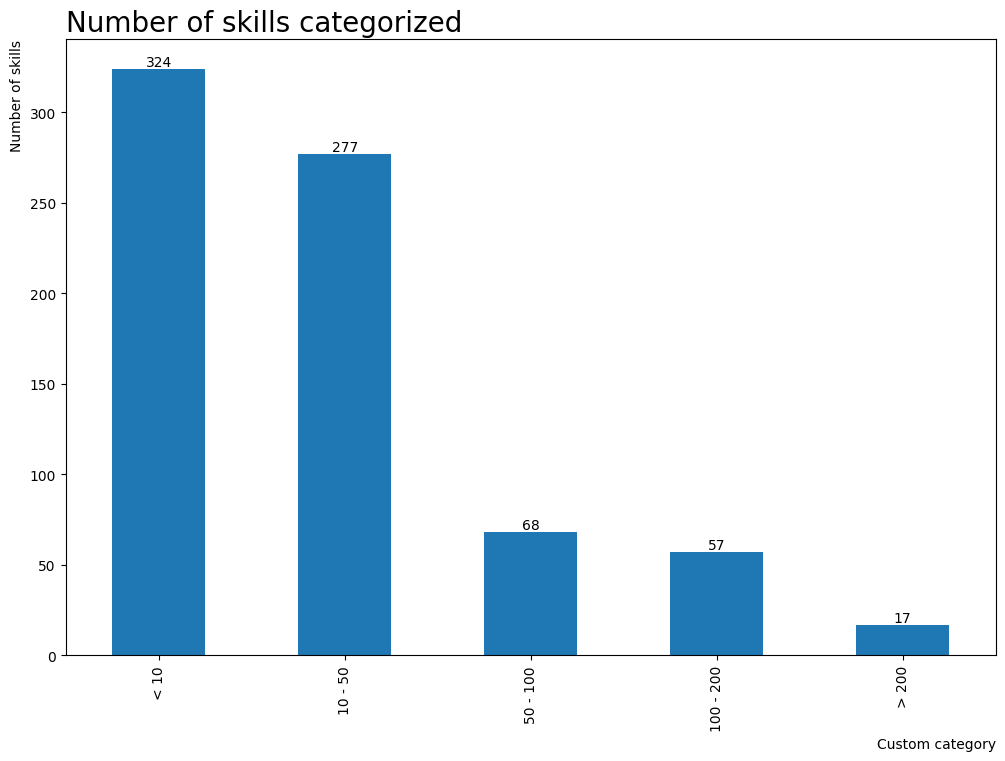

In [28]:
plt.figure(figsize=(12, 8))
ax = df_categorized.number_of_skills.plot(kind="bar")

# ##########
# # Set the categories as x labels
# ##########
ax.set_xticklabels(df_categorized.frequence_category)

###########
# Set bar labels
###########
rects = ax.patches
for rect, label in zip(rects, df_categorized.number_of_skills):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
        ha='center', va='bottom')

##########
# Set the titles
##########
ax.set_title("Number of skills categorized", fontsize=20,loc = 'left')
ax.set_xlabel("Custom category", fontsize=10,loc='right')
ax.set_ylabel("Number of skills", fontsize=10,loc = 'top')
#plt.savefig("plots/number_of_skills_categorized.png")
plt.show()

**Description of the plot** <br>
This visualization underlines the impression
gained of the uneven distribution of users across different skills. The figure shows that 324 skills
exist that have fewer than 10 users in Neusta. In contrast, there are only 17 skills that have more
than 200 user.

### Plot the number of skills per category

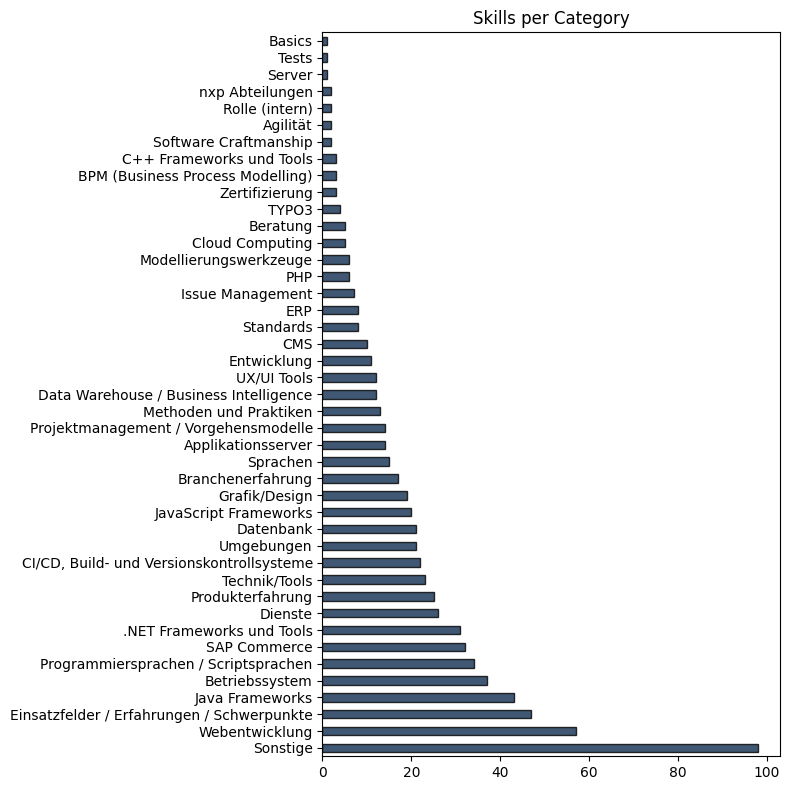

In [29]:
skills_to_category =df[["skill","category"]].drop_duplicates() 
fig, ax = plt.subplots(figsize=(8,8))
skills_to_category["category"].value_counts().plot(ax=ax,kind="barh",title="Skills per Category",                            color="#112e51",
                            edgecolor='k',
                            alpha=0.8)
plt.tight_layout()
plt.savefig("skills_per_category")

**Description of the plot** <br>
While the y-axis indicates the skill category, the x-axis shows the number
of skills within this category. The skill category with the most users is displayed first and the category
with the fewest users last on the x-axis. Observing the figure, it is particularly noticeable that
categories exist that contain only a single skill. Generally speaking a category with only one skill
is not appropriate. In addition, the skill volumes of the different categories differ very clearly from
each other. For example, the "Web Development" category includes 57 different skills, while the
"PHP" category includes only 6 skills.
<br> <br>
The interpretation of these observations allows, that the first category can be understood as an
outlier due to the high skill volume. This category was titled ’Other’ by Neusta, indicating that
includes skills, that could not be clearly assigned to the other categories. Therefore the compnay should consider to reassign  the skills within the "Other" category either to existing skill categories or to create new ones, since the "Other" category is a storage basin for skills and offers no value in terms
of content. If such a category is nevertheless created for practical reasons, it should not contain
the majority of all skills. In addition, the different volumes of the categories indicate that it may
be useful to restructure the categories so as not to overload individual categories, such as "web
developments". Although "PHP" is a discipline within web development, a conscious decision was
made to group PHP-related skills in a separate category ("PHP"). Such a graduation of content
along all categories would counteract the overloading of a few categories and create comparability
between categories. Finally, the categories that contain only one skill speak for restructuring the categories aswell.

### Calculate the cosine similarity

Cosine similarity is used to compare the similarity of binary vectors representing user-item interactions. By calculating the cosine similarity, we can identify similar skills.

In [30]:
# Create a user-item matrix
df["count"] = 1
matrix = df.pivot_table('count', index='person', columns="skill").fillna(0).astype(int).reset_index(drop=True)
#Set the index name = "userid"
matrix.index.names = ["userids"]
matrix

skill,.NET Compact Framework,.NET Core,.NET Framework,3D-Modellierung,ABAP,ADO.NET,AIX,ARIS,ARIS ITArchitect,AS400,...,ramda.js,ranorex,samba,script.aculo.us,varnish,visual paradigm,vnc,vs code,xHTML,xtCommerce
userids,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Function to calculate the cosine similarity:

In [31]:
def calculate_similarity(data_items):
    """Calculate the column-wise cosine similarity for a sparse
    matrix. Return a new dataframe matrix with similarities.
    """
    data_sparse = sparse.csr_matrix(data_items)
    similarities = cosine_similarity(data_sparse.transpose())
    sim = pd.DataFrame(data=similarities, index= data_items.columns, columns= data_items.columns)
    return sim

Similarity Matrix:

In [32]:
sim_matrix = calculate_similarity(matrix)
sim_matrix

skill,.NET Compact Framework,.NET Core,.NET Framework,3D-Modellierung,ABAP,ADO.NET,AIX,ARIS,ARIS ITArchitect,AS400,...,ramda.js,ranorex,samba,script.aculo.us,varnish,visual paradigm,vnc,vs code,xHTML,xtCommerce
skill,,,,,,,,,,,,,,,,,,,,,
.NET Compact Framework,1.000000,0.124035,0.319077,0.224133,0.000000,0.449823,0.065372,0.000000,0.087706,0.295656,...,0.000000,0.000000,0.266880,0.054393,0.000000,0.000000,0.218927,0.000000,0.336581,0.083624
.NET Core,0.124035,1.000000,0.274398,0.000000,0.000000,0.263752,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039223,0.091287,0.030151,0.000000
.NET Framework,0.319077,0.274398,1.000000,0.263416,0.000000,0.429715,0.108465,0.115045,0.097014,0.228924,...,0.000000,0.076696,0.221404,0.090249,0.000000,0.038348,0.309429,0.125245,0.320594,0.069375
3D-Modellierung,0.224133,0.000000,0.263416,1.000000,0.082479,0.089363,0.095238,0.050508,0.063888,0.086146,...,0.000000,0.000000,0.311046,0.198107,0.071429,0.050508,0.265789,0.041239,0.408627,0.152286
ABAP,0.000000,0.000000,0.000000,0.082479,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.204124,0.000000,0.000000,0.055048,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visual paradigm,0.000000,0.000000,0.038348,0.050508,0.204124,0.000000,0.000000,0.125000,0.000000,0.000000,...,0.000000,0.000000,0.096225,0.000000,0.000000,1.000000,0.043853,0.000000,0.033710,0.000000
vnc,0.218927,0.039223,0.309429,0.265789,0.000000,0.155178,0.206725,0.043853,0.110940,0.149592,...,0.000000,0.000000,0.573886,0.275208,0.124035,0.043853,1.000000,0.143223,0.425745,0.343776
vs code,0.000000,0.091287,0.125245,0.041239,0.000000,0.060193,0.000000,0.000000,0.000000,0.087039,...,0.000000,0.000000,0.157135,0.080064,0.144338,0.000000,0.143223,1.000000,0.137620,0.123091


Conventionally a heatmap is ideal to plot a similarity-matrix. However, the similartiy matrix listed here has a size of 734x734, which makes the visualization of all columns and rows very messy. <br>Therefore only a section of the similarity matrix is plotted in the following, so that a first visual impression of the cosine similarity of the skills can be gained. The following matrix is a 10x10 matrix and contains the first 10 rows and columns of the complete similarity matrix:

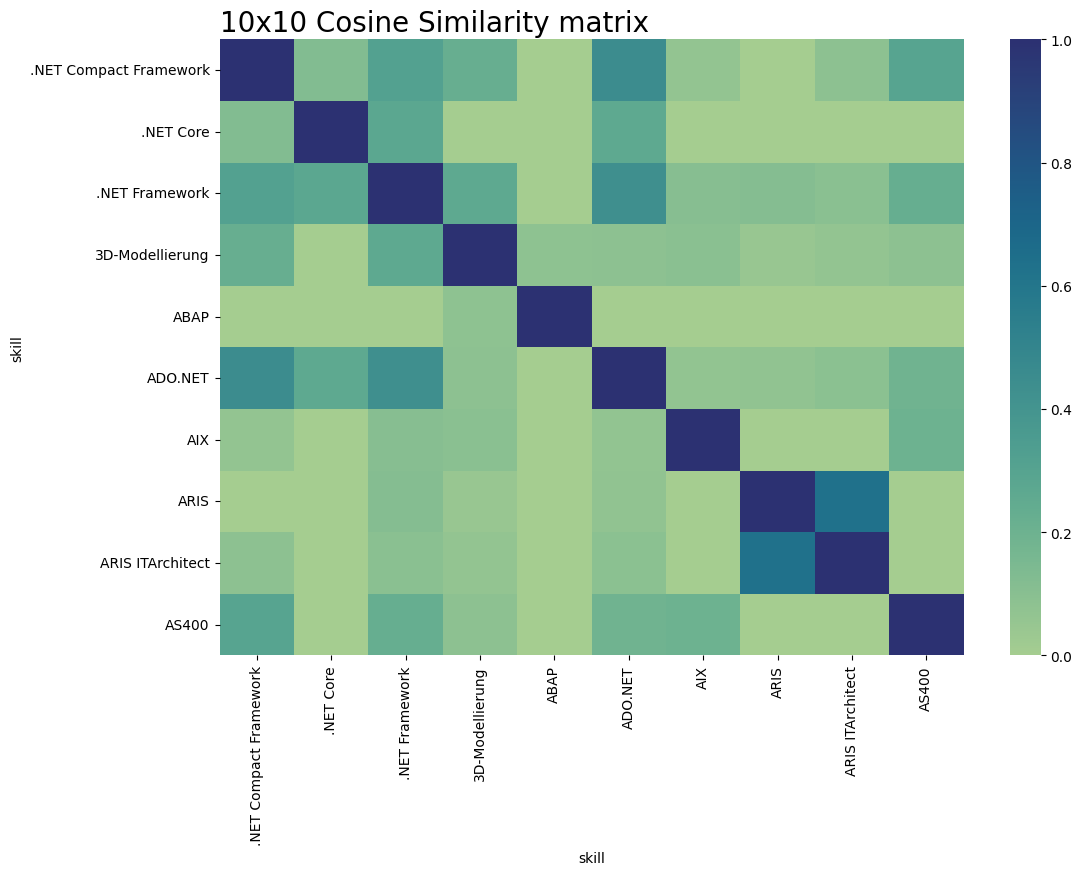

In [33]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(sim_matrix.iloc[0:10,0:10] ,vmin=0, vmax=1 ,cmap="crest")
ax.set_title("10x10 Cosine Similarity matrix", fontsize=20, loc = 'left')
plt.show()

**Description:** <br>
The heatmap visualizes the cosine similarity of the first 10 skills.  The similarity is represented by a color mapping. The bluer the cell, the higher the similarity between the corresponding skills.  Based on the first 10 skills, we see that the similarity is not high between all skills. However, there are some cosine similarities in the order of 0.4 (e.g. between "ADO.NET" and ".NET Compact Framework"). These similarities are understandable on a qualitative level, since both skills belong to the ".NET Framework". These similarities can potentially be recognized by a recommender system and used to generate suggestions.

## Rest

In [ ]:
df_skills_in_categories = df[["skill","category"]].drop_duplicates() 
df_skills_in_categories = df_skills_in_categories.groupby(['category'])["skill"].count().sort_values(ascending= False).to_frame().rename(columns = {"skill" : "number_of_skills"}).reset_index()
df_skills_in_categories.head(5)

,category,number_of_skills
0,Sonstige,98
1,Webentwicklung,57
2,Einsatzfelder / Erfahrungen / Schwerpunkte,47
3,Java Frameworks,43
4,Betriebssystem,37


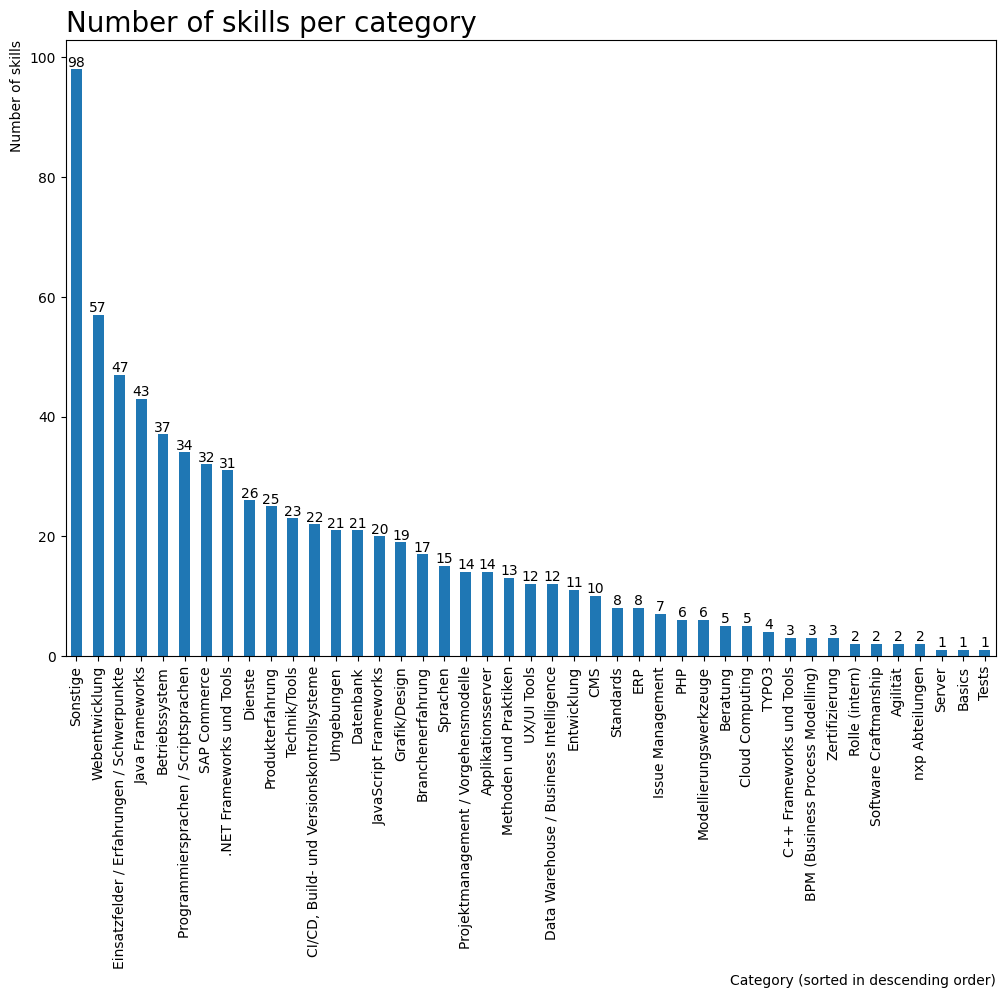

In [ ]:
plt.figure(figsize=(12, 8))
ax = df_skills_in_categories.number_of_skills.plot(kind="bar")

# ##########
# # Set the categories as x labels
# ##########
ax.set_xticklabels(df_skills_in_categories.category)

###########
# Set bar labels
###########
rects = ax.patches
for rect, label in zip(rects, df_skills_in_categories.number_of_skills):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
        ha='center', va='bottom')

##########
# Set the titles
##########
ax.set_title("Number of skills per category", fontsize=20,loc = 'left')
ax.set_xlabel("Category (sorted in descending order)", fontsize=10,loc='right')
ax.set_ylabel("Number of skills", fontsize=10,loc = 'top')
#plt.savefig("plots/number_of_skills_per_category.png")
plt.show()

Show size of categories: 

Books: 

https://www.taylorfrancis.com/books/edit/10.1201/9780367631888/recommender-systems-pavan-kumar-vairachilai-sirisha-potluri-sachi-nandan-mohanty

https://beluga.sub.uni-hamburg.de/vufind/Record/1656091313?rank=1

Drop certain skill categories: 